##  Import necessary libraries

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Read all the file names in all 4 folders (nature, cartoons, books, car)

In [72]:
books=glob.glob('books/*.jpg')
car=glob.glob('car/*.jpg')
nature=glob.glob('nature/*.jpg')
cartoons=glob.glob('cartoons/*.jpg')



### Read image data from all files and store it in a variable, Store the label as well

In [73]:
image=[]
labels=[]
for i in books:
    img=plt.imread(i)
    image.append(img)
    labels.append(1)
for i in car:
    img=plt.imread(i)
    image.append(img)
    labels.append(2)
for i in nature:
    img=plt.imread(i)
    image.append(img)
    labels.append(3)
for i in cartoons:
    img=plt.imread(i)
    image.append(img)
    labels.append(4)

### Plot some of the images

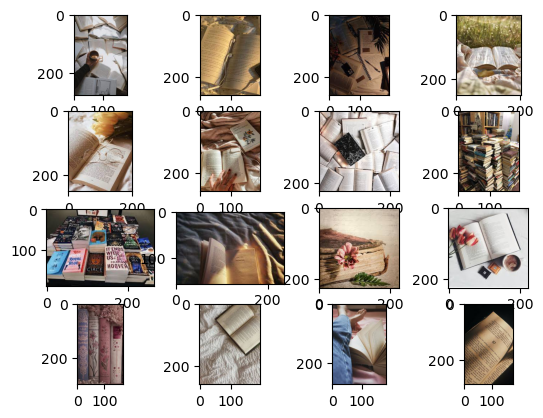

In [74]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(image[i])

### Shuffle images and labels 

In [75]:
image,labels=shuffle(image,labels)

### Plot the images once again

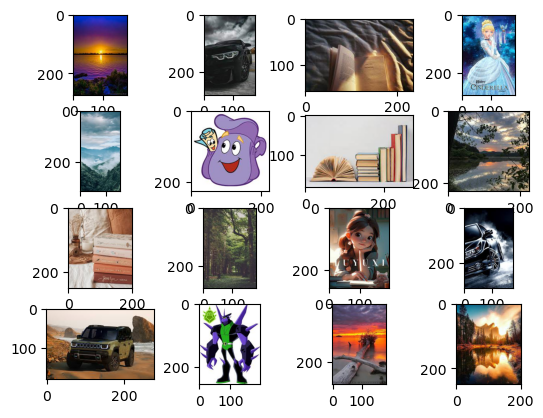

In [76]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(image[i])

### Check the shape of some of the images

In [77]:
for i in range(10):
    print(image[i].shape)

(274, 184, 3)
(281, 180, 3)
(157, 235, 3)
(275, 183, 3)
(318, 159, 3)
(228, 222, 3)
(183, 275, 3)
(225, 225, 3)
(251, 201, 3)
(275, 183, 3)


### Resize all the images to a same height and width

In [85]:
X = []

for i in image:
    X.append(resize(i, (500,500,3)))

## Convert images and labels to numpy array and store them as X and y variables

In [86]:
X=np.array(X)
y=np.array(labels)


### Reshape the images to 1 dimension

In [87]:
d1,d2,d3,d4=X.shape
X = X.reshape((d1, d2*d3*d4))

### Train test Split

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Create Logistic Regression Model and train it

In [92]:
model=LogisticRegression()

In [93]:
model.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Make predictions with X_test

In [94]:
y_pred=model.predict(X_test)

In [95]:
y_pred

array([2, 1, 1, 4, 3, 4, 2, 2, 3, 3, 4, 1, 3, 4, 1, 1, 4, 4, 2, 2, 3, 1,
       1, 1])

### Evaluate the model

In [98]:
accuracy_score(y_test,y_pred)

0.5416666666666666

<Axes: >

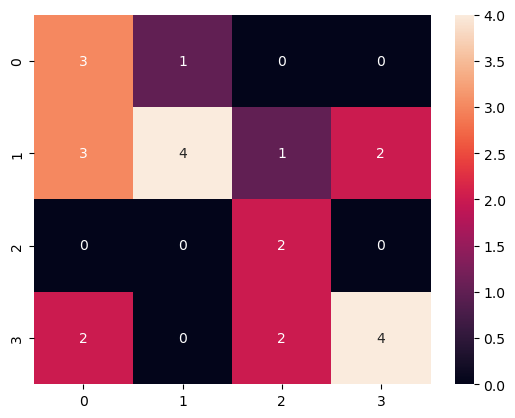

In [100]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.38      0.75      0.50         4
           2       0.80      0.40      0.53        10
           3       0.40      1.00      0.57         2
           4       0.67      0.50      0.57         8

    accuracy                           0.54        24
   macro avg       0.56      0.66      0.54        24
weighted avg       0.65      0.54      0.54        24

